# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we shall see how to apply regression analysis using CART trees for regression, with some hyper parameter tuning as we saw in the case of classification. For a comparison of predictive capabilities and computational cost, we shall work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved. 

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [1]:
# Import libraries necessary
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the Boston housing dataset
data = pd.read_csv('boston.csv')

print(f"Boston housing dataset has {data.shape[0]} data points with {data.shape[1]} variables each.")
data.head()

Boston housing dataset has 506 data points with 15 variables each.


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Identify Features and Target Data
In this lab, we shall use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`' has been multiplicatively scaled to account for 35 years of market inflation.


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [3]:
# Identify Features and Target Data
target = data['medv']
features = data[['rm', 'lstat', 'ptratio']]

In [4]:
target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [5]:
features.head()

,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

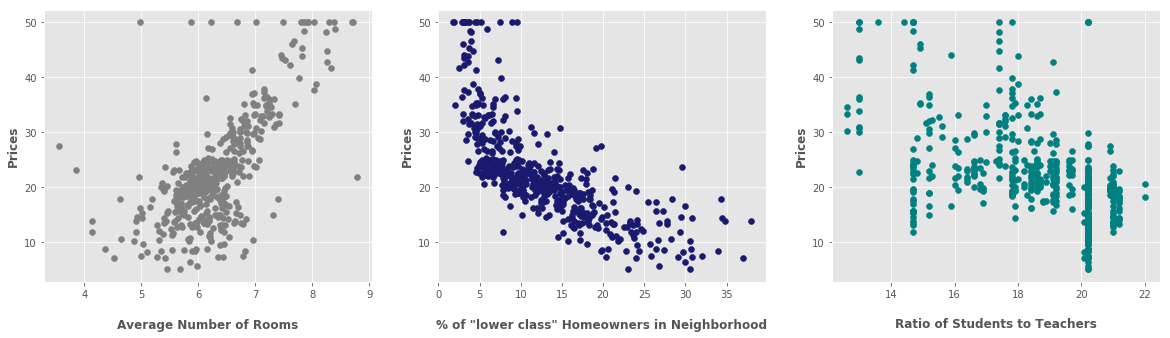

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(data['rm'], data['medv'], color='grey')
ax1.set_xlabel('\nAverage Number of Rooms', fontweight='bold')
ax1.set_ylabel('Prices', fontweight='bold')

ax2.scatter(data['lstat'], data['medv'], color='midnightblue')
ax2.set_xlabel('\n% of "lower class" Homeowners in Neighborhood', fontweight='bold')
ax2.set_ylabel('Prices', fontweight='bold')

ax3.scatter(data['ptratio'], data['medv'],  color='teal')
ax3.set_xlabel('\nRatio of Students to Teachers', fontweight='bold')
ax3.set_ylabel('Prices', fontweight='bold');

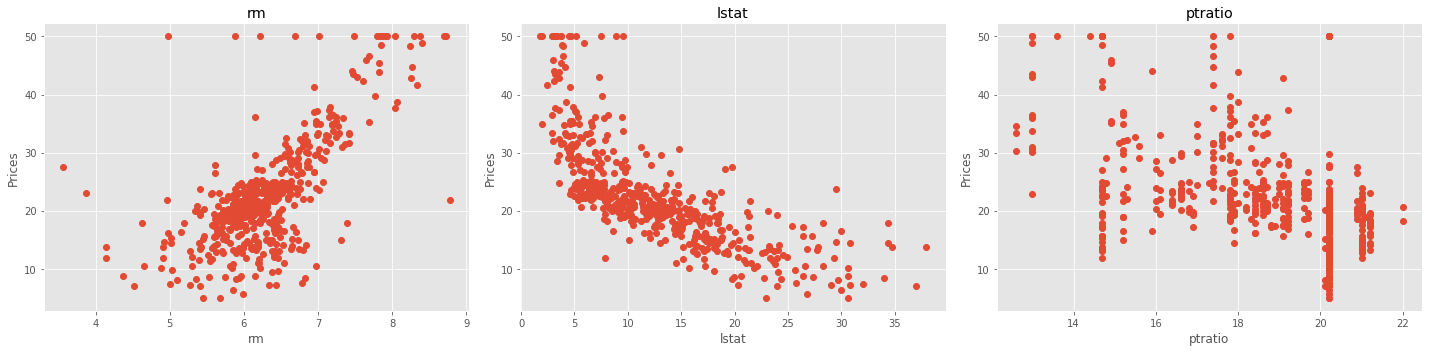

In [7]:
# another way of plotting:
plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], target, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()

In [8]:
# Your observations: 

# --> positive relationship between 'rm' and 'prices': the higher the rooms the higher the price

# --> negative relationship between 'lstat' and 'prices': 
#     the more lower class in the neighborhood the rooms the lower the price

# --> P-T-Ratio has a high variance and is not explaining the 'prices' well

# all in all: 2 out of these three look like good predictors

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-sqaured score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [9]:
# Import evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return [r2, mse]

# Calculate the performance of this model
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

[0.9228556485355649, 0.4719999999999998]

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [10]:
# Import train-test-split
from sklearn.model_selection import train_test_split 

# Perform train-test-split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [11]:
# Import the model 
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_test_pred = regressor.predict(X_test)

# Evaluate
score = performance(y_test, y_test_pred)
score[0], score[1]

(0.47097115950374013, 38.795686274509805)

In [12]:
# Your observations:

# --> very low value for R-Squared
# --> MSE (38.79568) is high compared to the the mean of the target (22.532806)

# Mainly because of overfitting, the tree is grown very deep to minimize the observations in leafs
# i.e. needs some tuning

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

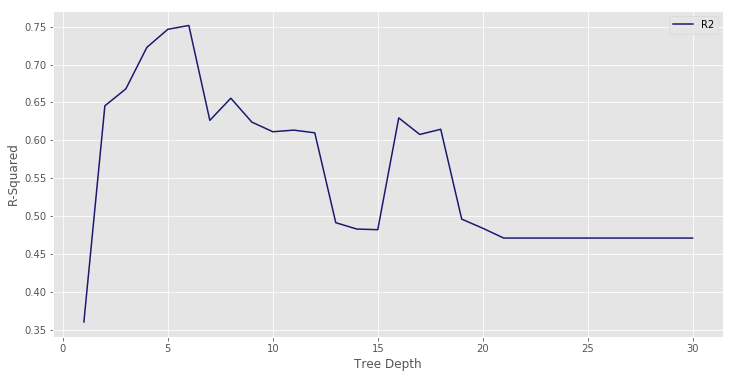

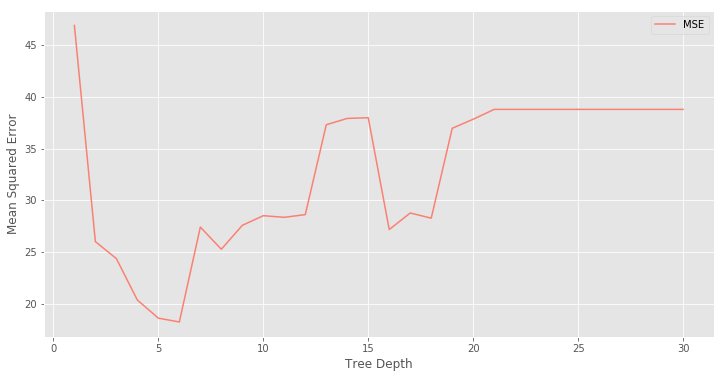

In [13]:
# Identify the optimal tree depth for given data

# Create an array for depth values ranging from 1 - 30
max_depths = np.linspace(1, 30, 30, endpoint=True)
r2_results = []
mse_results = []

# In a loop, train the regressor for each depth value (30 runs) 
for max_depth in max_depths:
    
    # Train the regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    
    # Predict on Test Data
    y_test_pred = regressor.predict(X_test)
    
    # Evaluate
    score = performance(y_test, y_test_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

# Plot R^2
plt.figure(figsize=(12,6))
plt.plot(max_depths, r2_results, 'midnightblue', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

# Plot MSE
plt.figure(figsize=(12,6))
plt.plot(max_depths, mse_results, 'salmon', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [14]:
# Your observations: 

# Lowest value of MSE AND highest value of R2 reached at depth 6
# after that: a lot of fluctuation and no improvements
# --> Depth 5 - 6 seems to be optimal

## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

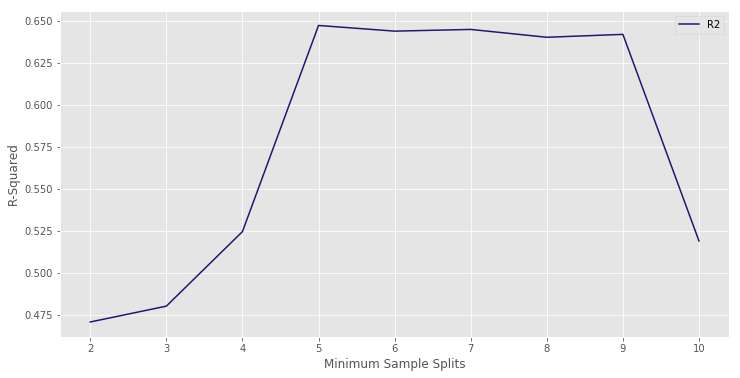

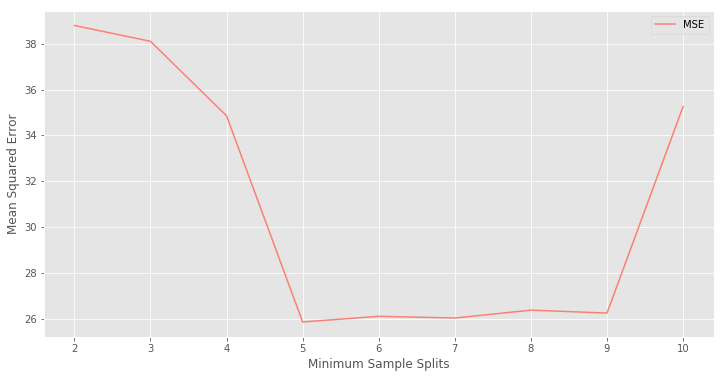

In [15]:
# Identify the optimal min-samples-split for given data

# Create an array for min_sample_splits values ranging from 2 - 10
min_samples_splits = np.arange(2,11)
r2_results = []
mse_results = []

# In a loop, train the regressor for each depth value (30 runs) 
for min_samples_split in min_samples_splits:
    
    # Train the regressor
    regressor = DecisionTreeRegressor(min_samples_split=min_samples_split, 
                                      random_state=45)
    regressor.fit(X_train, y_train)
    
    # Predict on Test Data
    y_test_pred = regressor.predict(X_test)
    
    # Evaluate
    score = performance(y_test, y_test_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

# Plot R^2
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, r2_results, 'midnightblue', label='R2')
plt.xlabel('Minimum Sample Splits')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

# Plot MSE
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, mse_results, 'salmon', label='MSE')
plt.xlabel('Minimum Sample Splits')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [16]:
# Your observations: 

# Lowest value of MSE AND highest value of R2 reached at minimum split size between 5 - 9 
# The performance of the model drops outside this range 
# --> 6 or 7 are the optimal values as its not advisable to choose border values (like 5 or 9)

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [17]:
# Instantiate the optimized model
regressor = DecisionTreeRegressor(min_samples_split=6, max_depth=6, random_state=45)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_test_pred = regressor.predict(X_test)

# Evaluate
score = performance(y_test, y_test_pred)
print('R-Squared:', score[0])
print('MSE:      ', score[1])
print('\nModel:    ', regressor)

R-Squared: 0.7510017608643338
MSE:       18.259982876077185

Model:     DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')


In [18]:
# Your observation:

# R2: a huge improvement from 0.47 to 0.75!
# MSE: the same huge improvement from 38.795 to 18.259!
# --> thus: Hyperparameter optimization does have a strong impact on the performance of a model 
# (Maybe tuning some more parameters can lead to even better preditions)

## Visualize the tree
- Visualize the trained model as we did in previous sections
- Show the labels for each variable being split in a node
- Interpret the tree

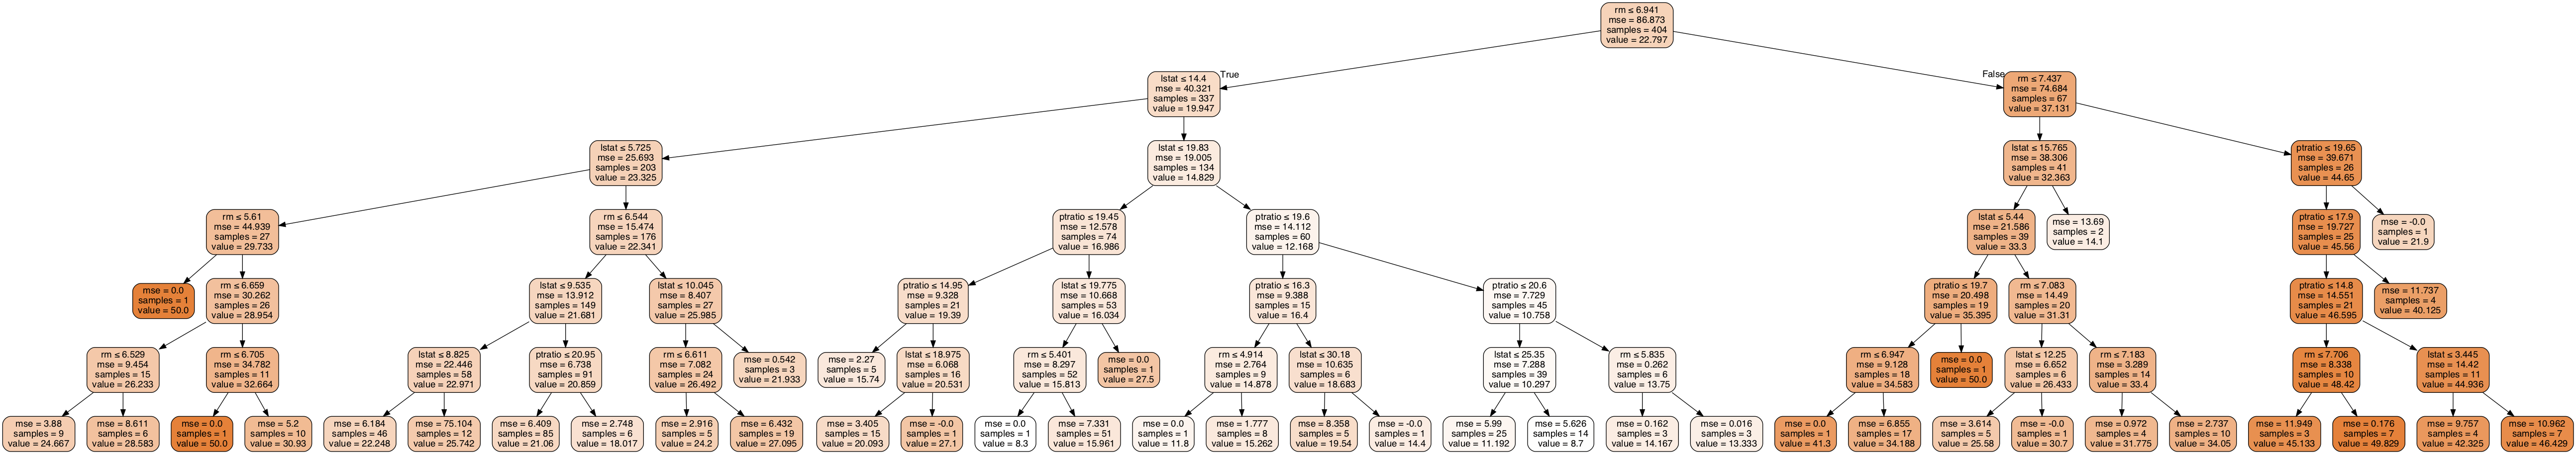

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=features.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
# Your observations:

# Following each path starting from root node and creating rules defined by the splits:

# e.g. IF rm < 6.9 & lstat <14.4 & ptratio is less than 20.6 --> predicted value for the house is 10.29
# we see 30+ samples and a low MSE to be confident about this rule 

# Differentiate between light and dark leaf nodes...

## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors
- Also , Tune more more hyper parameters like max-features to find the optimal model 


## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later. In the next section we shall look at running "Grid Searches" for identifying the best model while tuning all required hyper-parameters - at once. 